# EDA

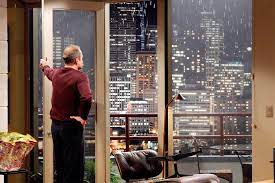

In [82]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.2f' % x)


pd.set_option('display.max_columns', 50)

# Stakeholder
Timothy Stevens: Owns expensive houses in the center, needs to get rid, best timing within a year, open for renovation when profits rise.

# Import the data

In [67]:
df = pd.read_csv("data/King_County_House_prices_dataset.csv")

# Understanding the data


In [68]:
df.info()
# waterfront and yr_renovated contain NAs
# date needs to be converted
# Better description of columns can be found here: https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/
# Info on Zipcodes: https://gis-kingcounty.opendata.arcgis.com/datasets/zipcodes-for-king-county-and-surrounding-area-shorelines-zipcode-shore-area/explore?location=47.504243%2C-121.477600%2C8.67
# sqft_living15 is the avarage size of living space of the closest 15 neighbours. Will help to determine if a house is bigger compared to neighbors.
# view - An index from 0 to 4 of how good the view of the property was
#condition - An index from 1 to 5 on the condition of the apartment,
#grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# Research questions + hypotheses and Todo
Stakeholder: Timothy Stevens: Owns expensive houses in the center, needs to get rid, best timing within a year, open for renovation when profits rise.

Question: When is the best timing to sell houses?
Hypothesis: The avarage price varies over the year

Question: Will a recent renovation increase the selling price?
Hypothesis: Houses renovated in the same year have a higher avarage price.

Hypothesis: There is a correlation between grade and price, sqft_living and price.
Hypothesis: View, grade and condition are positively correlated.


Geohypo: Plot a map with $/sqft per zipcode. Hypo: Higher in seattle.


For the EDA:
1. Filter for houses in the center (by zipcode?). What is the center? Seattle?
2. Define 'expensive' (80% quartile?). 




# Data exploration

In [69]:
#df.hist(column=["price","bedrooms","sqft_living","floors","grade","yr_built","yr_renovated","sqft_living15"],layout=(4,2),figsize=(12,6))

# There are a few very big very very expensive houses
# Filter them for a first glance

#df[df.price < 4000000].hist(column=["price","bedrooms","sqft_living","floors","grade","yr_built","yr_renovated","sqft_living15"],layout=(4,2),figsize=(12,6))

# There seem to be some houses that are very high cost and/or high number of bedrooms, very high number of sqft_living. Maybe outliers? need to check.
# Most houses have not been renovated which is sometimes a 0 and sometimes NaN !

df[df.price > 7000000]
# 45 houses over 3 million
# 2 houses over 7 million

df[df.bedrooms > 10]
# 2 houses with more than 10 bedrooms, 33 bedrooms one is probably a typo because it is not too big.

df[df.sqft_living > 8000]
# 211 houses with over 5k sqft living
# 9 houses with over 8k sqft living. all with high grade and a high price so probably valid data.




# Note: Delete the 33 bedroom one, apart from that all looks 'normal'



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1162,1247600105,10/20/2014,5110000.000,5,5.250,8010,45517,2.000,1.000,4.000,...,12,5990,2020.0,1999,0.000,98033,47.677,-122.211,3430,26788
3910,9808700762,6/11/2014,7060000.000,5,4.500,10040,37325,2.000,1.000,2.000,...,11,7680,2360.0,1940,2001.000,98004,47.650,-122.214,3930,25449
4407,2470100110,8/4/2014,5570000.000,5,5.750,9200,35069,2.000,0.000,0.000,...,13,6200,3000.0,2001,NaN,98039,47.629,-122.233,3560,24345
7245,6762700020,10/13/2014,7700000.000,6,8.000,12050,27600,2.500,0.000,3.000,...,13,8570,3480.0,1910,1987.000,98102,47.630,-122.323,3940,8800
8085,1924059029,6/17/2014,4670000.000,5,6.750,9640,13068,1.000,1.000,4.000,...,12,4820,4820.0,1983,2009.000,98040,47.557,-122.210,3270,10454
9245,9208900037,9/19/2014,6890000.000,6,7.750,9890,31374,2.000,0.000,4.000,...,13,8860,1030.0,2001,0.000,98039,47.630,-122.240,4540,42730
12764,1225069038,5/5/2014,2280000.000,7,8.000,13540,307752,3.000,0.000,4.000,...,12,9410,4130.0,1999,0.000,98053,47.667,-121.986,4850,217800
14542,2303900035,6/11/2014,2890000.000,5,6.250,8670,64033,2.000,0.000,4.000,...,13,6120,2550.0,1965,NaN,98177,47.730,-122.372,4140,81021
18288,6072800246,7/2/2014,3300000.000,5,6.250,8020,21738,2.000,0.000,0.000,...,11,8020,0.0,2001,NaN,98006,47.568,-122.189,4160,18969


# Feature engineering

In [70]:
# Seattle column. 

# Zip codes for seattle
#sorted(df.zipcode.unique())

# Seattle Zipcodes range from 98101-98199 (only 64 are taken)(https://www.zipcode.com.ng/2022/12/seattle-zip-codes-wa.html)

df["seattle"] = df.zipcode.between(98101,98200)
df.groupby("seattle").mean()

# Interestingly the avarage price does not differ, but houses within Seattle are smaller, with fewer bed and bathrooms and the lot is much smaller.




,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
seattle,,,,,,,,,,,,,,,,,,,
False,4564301555.562,544000.476,3.517,2.273,2282.881,21243.162,1.518,0.007,0.185,3.389,7.885,2034.131,1982.403,53.770,98038.370,47.522,-122.130,2202.569,17432.359
True,4603227499.785,535085.600,3.171,1.894,1795.344,6455.840,1.461,0.008,0.302,3.439,7.339,1443.158,1954.956,126.144,98133.639,47.613,-122.332,1682.805,6182.386


In [71]:
# Price per sqft


df["price_sqft_liv"] = df.price / df.sqft_living
df["price_sqft_lot"] = df.price / df.sqft_lot
df.groupby("seattle").mean()

# Price per sqft is higher in seattle compared to the outskirts. However, the difference is even higher for the lot price.


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_sqft_liv,price_sqft_lot
seattle,,,,,,,,,,,,,,,,,,,,,
False,4564301555.562,544000.476,3.517,2.273,2282.881,21243.162,1.518,0.007,0.185,3.389,...,2034.131,1982.403,53.770,98038.370,47.522,-122.130,2202.569,17432.359,235.254,59.640
True,4603227499.785,535085.600,3.171,1.894,1795.344,6455.840,1.461,0.008,0.302,3.439,...,1443.158,1954.956,126.144,98133.639,47.613,-122.332,1682.805,6182.386,304.788,130.280


In [85]:
# Center = Seattle might not be the best definition.
# Alternatively, I will use the Top10 Zipcodes with the highest population density according to: http://www.usa.com/rank/king-county-wa--population-density--zip-code-rank.htm?yr=9000&dis=&wist=&plow=&phigh=

df["center"] = df.zipcode.isin([98164,98174,98121,98101,98104,98102,98122,98109,98107,98103])

df.groupby(["seattle","center"]).mean()
# Very cool. Price per sqft rises from rural -> seattle -> center

id     price  bedrooms  bathrooms  sqft_living  \
seattle center                                                             
False   False  4564301555.56 544000.48      3.52       2.27      2282.88   
True    False  4597128036.08 515860.43      3.18       1.87      1806.15   
        True   4638679506.84 641687.67      3.07       2.03      1735.54   

                sqft_lot  floors  waterfront  view  condition  grade  \
seattle center                                                         
False   False   21243.16    1.52        0.01  0.19       3.39   7.88   
True    False    6997.50    1.40        0.01  0.32       3.44   7.29   
        True     3450.56    1.82        0.00  0.20       3.42   7.60   

                sqft_above  yr_built  yr_renovated  zipcode   lat    long  \
seattle center                                                              
False   False      2034.13   1982.40       1995.41 98038.37 47.52 -122.13   
True    False      1441.68   1955.33       1995.66 98138.23 47.61 -122.33   
        True       1451.66   1952.88       1999.16 98108.20 47.65 -122.34   

                sqft_living15  sqft_lot15  price_sqft_liv  price_sqft_lot  
seattle center                                                             
False   False         2202.57    17432.36          235.25           59.64  
True    False         1692.75     6669.29          291.03          110.43  
        True          1627.86     3481.71          381.08          240.44

# Data Cleaning

datetime64[ns]


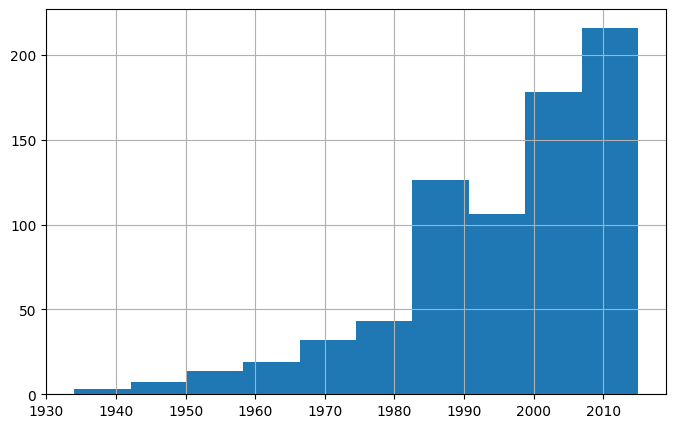

In [76]:
# Drop the 33 bedroom row.
df = df[df.bedrooms < 33]

# get the date right
df["date"] = pd.to_datetime(df.date, format= '%m/%d/%Y')

# year renovated has some strange data according to the histograms
df.yr_renovated 
# Seems that non-renovated houses either have a NaN or a 0. Convert 0 to NaN
df["yr_renovated"] = df["yr_renovated"].replace(0,np.nan)
df["yr_renovated"].hist() # Looking better now.

print(df.date.dtypes)


# Correlations


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000,0.309,0.526,0.702,0.090,0.257,0.396,0.036,0.668,0.605,0.054,0.130,0.585,0.083
bedrooms,0.309,1.000,0.515,0.578,0.032,0.178,0.079,0.026,0.357,0.479,0.156,0.018,0.393,0.031
bathrooms,0.526,0.515,1.000,0.756,0.088,0.503,0.186,-0.126,0.666,0.687,0.507,0.051,0.570,0.088
sqft_living,0.702,0.578,0.756,1.000,0.173,0.354,0.283,-0.059,0.763,0.876,0.318,0.056,0.756,0.184
sqft_lot,0.090,0.032,0.088,0.173,1.000,-0.005,0.075,-0.009,0.115,0.184,0.053,0.005,0.145,0.718
floors,0.257,0.178,0.503,0.354,-0.005,1.000,0.028,-0.264,0.459,0.524,0.489,0.004,0.280,-0.011
view,0.396,0.079,0.186,0.283,0.075,0.028,1.000,0.046,0.250,0.166,-0.055,0.101,0.280,0.073
condition,0.036,0.026,-0.126,-0.059,-0.009,-0.264,0.046,1.000,-0.147,-0.159,-0.362,-0.062,-0.093,-0.003
grade,0.668,0.357,0.666,0.763,0.115,0.459,0.250,-0.147,1.000,0.756,0.448,0.017,0.714,0.121
sqft_above,0.605,0.479,0.687,0.876,0.184,0.524,0.166,-0.159,0.756,1.000,0.424,0.022,0.732,0.195


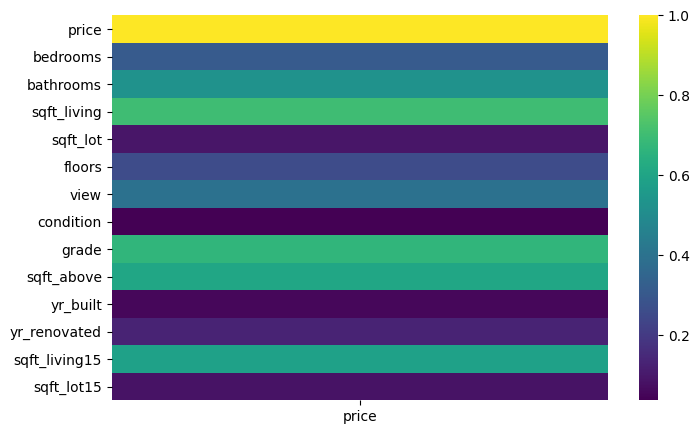

In [6]:
# 1. condition, view and grade
df[["grade","view","condition","seattle"]].groupby("seattle").corr()
# Grade and view are marginally correlated, but condition isn't. Might be worth to deepdive in what exactly they mean.
# View = quality der Besichtigung???
# Grade = How well is it constructed?
# Condition = Wie gut ist es in Schuss?!

# What influences the price?
df[["grade","view","condition","seattle"]].groupby("seattle").corr()
corr_mat_price = df.drop(["id","date","waterfront","zipcode","lat","long","seattle"],axis=1).corr()
sns.heatmap(corr_mat_price[["price"]], cmap="viridis")
corr_mat_price[["price"]]
# Factors influencing the price (> 50%)
# Bathrooms, sqft-living, grade, sqft_above, sqft_living15
# However, yr_renovated doesnt make sense without changing it!!!


### Note: Scatter
corr_mat_price

<AxesSubplot:xlabel='view', ylabel='price'>

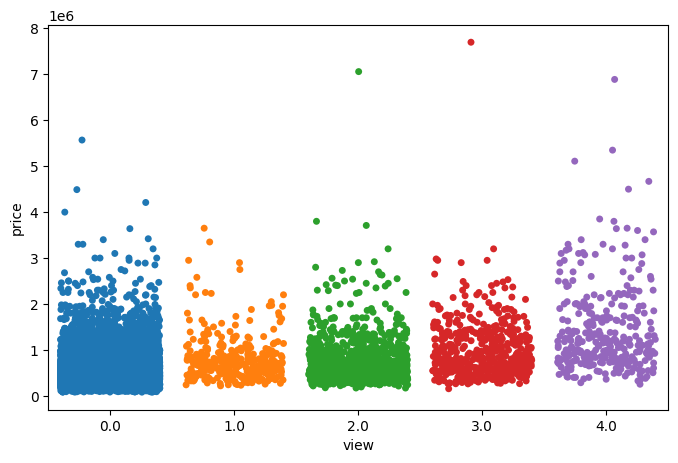

In [12]:
sns.stripplot(df.view,df.price, jitter=0.4)